In [5]:
import pandas as pd
import math
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv", low_memory=False)

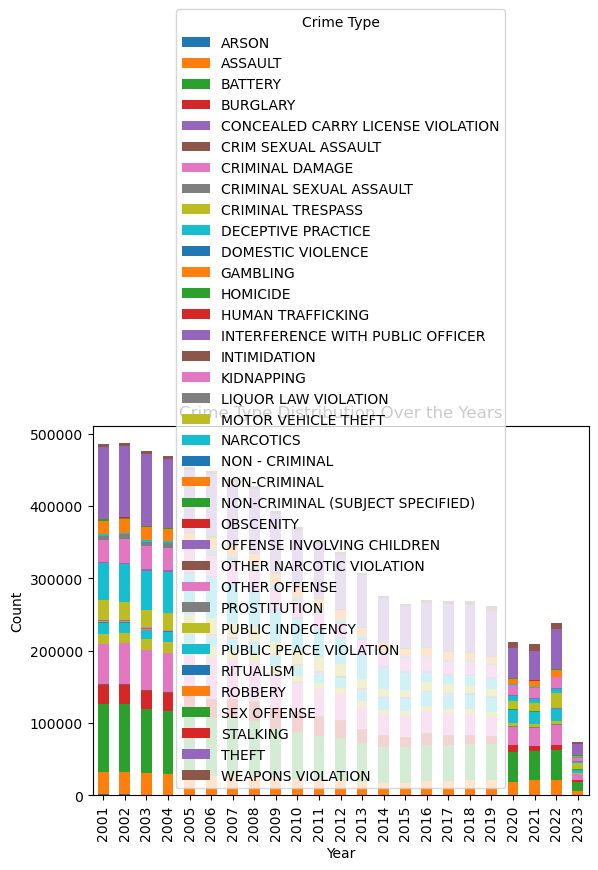

In [7]:
list(df.columns)
newdf = df

cross_table = pd.crosstab(newdf['Year'], newdf['Primary Type'])


cross_table.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Type Distribution Over the Years')
plt.legend(title='Crime Type')
plt.show()

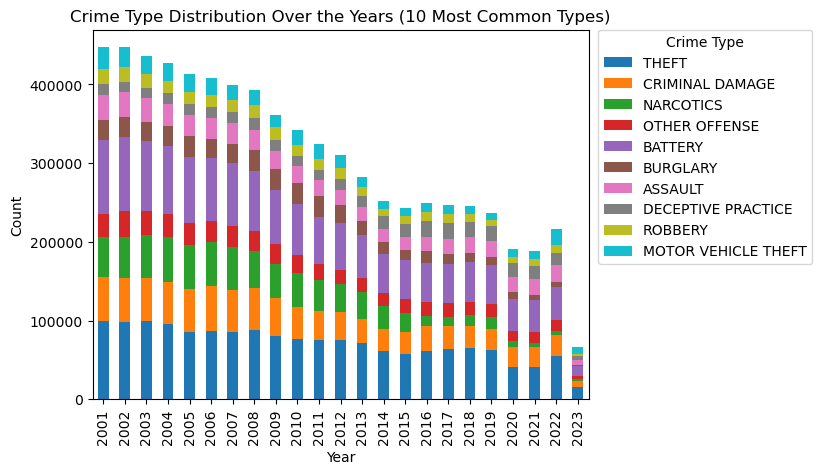

In [27]:
newdf1 = cross_table[['THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'ASSAULT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'MOTOR VEHICLE THEFT']]

newdf1.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Type Distribution Over the Years (10 Most Common Types)')
plt.legend(title='Crime Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

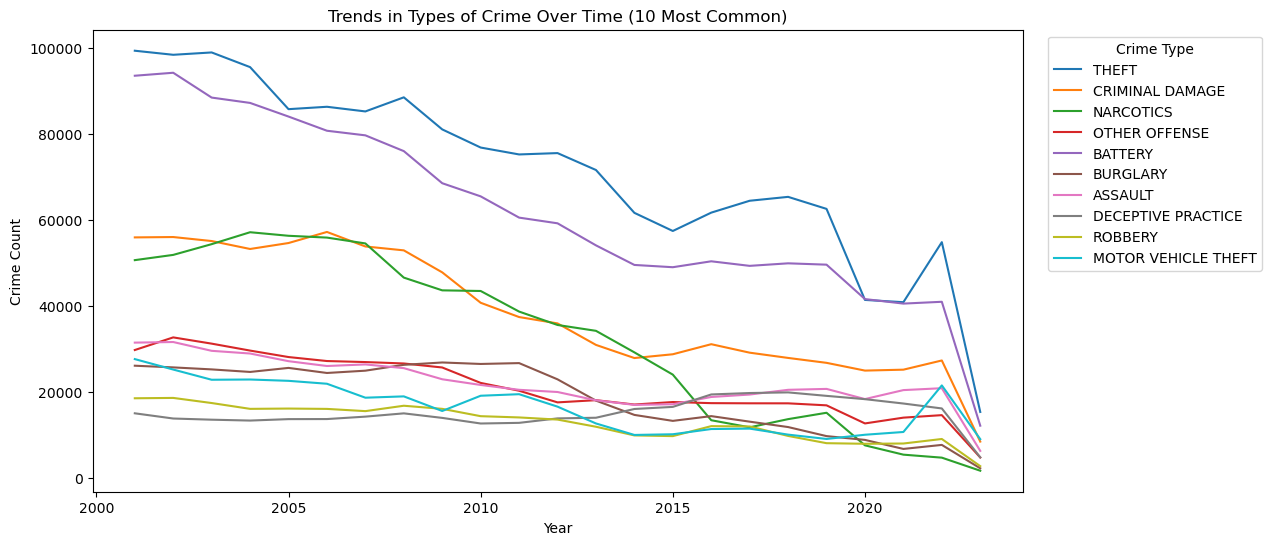

In [30]:
crime_counts = newdf.groupby(['Year', 'Primary Type']).size().unstack()
newdf2 = crime_counts[['THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'ASSAULT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'MOTOR VEHICLE THEFT']]


newdf2.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Types of Crime Over Time (10 Most Common)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

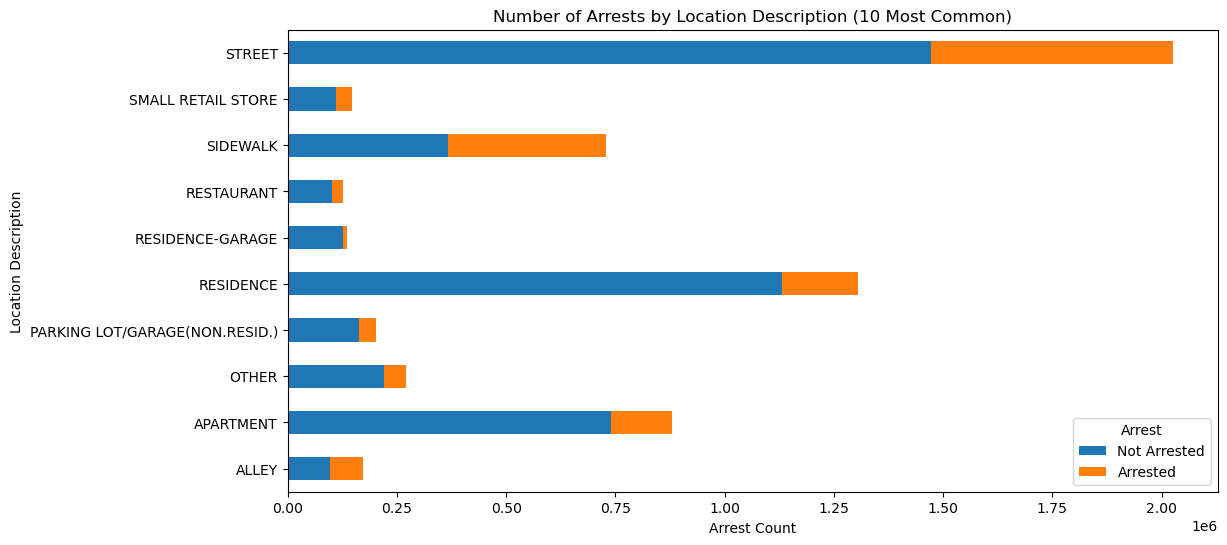

In [86]:
arrest_counts = newdf.groupby(['Location Description', 'Arrest']).size().unstack().fillna(0).reset_index()
arrest_counts1 = arrest_counts.loc[arrest_counts['Location Description'].isin(['STREET', 'RESIDENCE', 'APARTMENT', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'OTHER', 'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'RESTAURANT', 'ALLEY'])]

arrest_counts1.plot(kind='barh', stacked=True, figsize=(12, 6), label=arrest_counts1['Location Description'])
ax=plt.subplot(111)
tickvalues = range(0,len(arrest_counts1['Location Description']))
plt.yticks(ticks = tickvalues, labels = arrest_counts1['Location Description'], rotation = 'horizontal')
plt.title('Number of Arrests by Location Description (10 Most Common)')
plt.xlabel('Arrest Count')
plt.ylabel('Location Description')
plt.legend(title='Arrest', labels=['Not Arrested', 'Arrested'])
plt.show()

In [33]:
newdf.groupby(['Location Description', 'Arrest']).size().sort_values(ascending=False).head(15)

Location Description            Arrest
STREET                          False     1472194
RESIDENCE                       False     1130772
APARTMENT                       False      739520
STREET                          True       554634
SIDEWALK                        False      366376
                                True       362489
OTHER                           False      220643
RESIDENCE                       True       175071
PARKING LOT/GARAGE(NON.RESID.)  False      163034
APARTMENT                       True       139822
RESIDENCE-GARAGE                False      127774
SMALL RETAIL STORE              False      110068
RESTAURANT                      False      102433
SCHOOL, PUBLIC, BUILDING        False      102083
ALLEY                           False       97699
dtype: int64

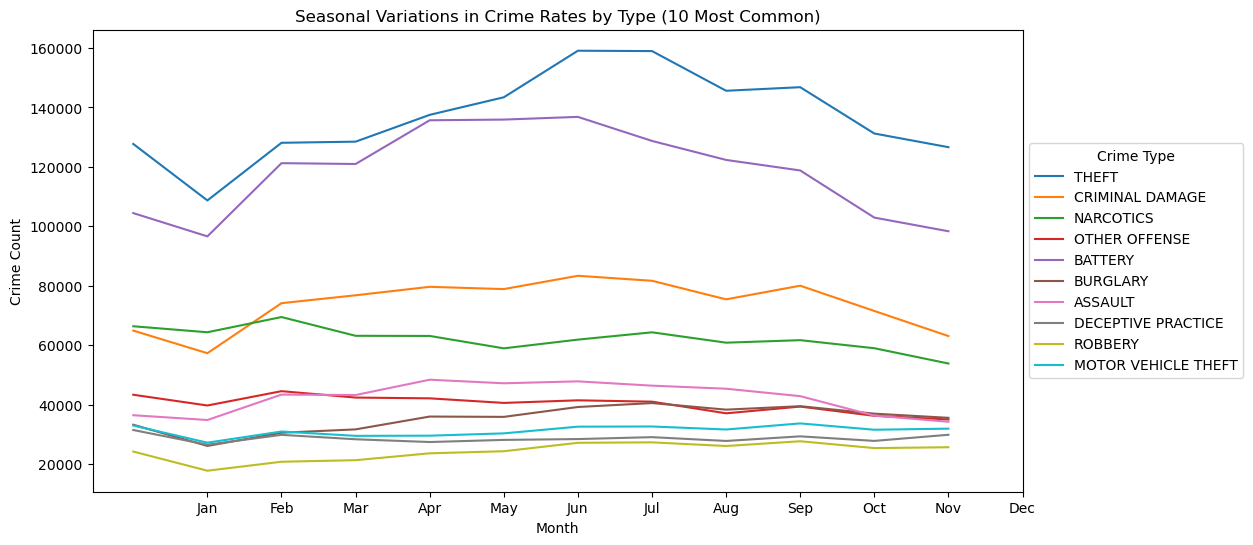

In [90]:
newdf["Month"] = ([x[0].split('/')[0] for x in (newdf["Date"].str.split())])
crime_counts_by_month = newdf.groupby(['Month', 'Primary Type']).size().unstack()
crime_counts_by_month1 = crime_counts_by_month[['THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'ASSAULT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'MOTOR VEHICLE THEFT']]

crime_counts_by_month1.plot(kind='line', figsize=(12, 6))
plt.title('Seasonal Variations in Crime Rates by Type (10 Most Common)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()